In [1]:
import pandas as pd # Для работы с табличными данными
import numpy as np # Для работы с массивами

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

In [26]:
df = pd.read_csv('hotel_bookings.csv', sep = ',')
df['stays_in_weeks_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_weeks_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
df = df.drop(['arrival_date_year', 'arrival_date_month' , 'arrival_date_week_number', 'stays_in_weekend_nights', ''
             'market_segment', 'agent', 'company', 'adr', 'reservation_status_date'], axis = 1)
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82066 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82066 non-null  object 
 1   is_canceled                     82066 non-null  int64  
 2   lead_time                       82066 non-null  int64  
 3   stays_in_weekend_nights         82066 non-null  int64  
 4   stays_in_week_nights            82066 non-null  int64  
 5   adults                          82066 non-null  int64  
 6   children                        82066 non-null  float64
 7   babies                          82066 non-null  int64  
 8   meal                            82066 non-null  object 
 9   country                         82066 non-null  object 
 10  distribution_channel            82066 non-null  object 
 11  is_repeated_guest               82066 non-null  int64  
 12  previous_cancellations         

In [28]:
df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_weeks_nights
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,C,C,3,No Deposit,0,Transient,0,0,Check-Out,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,C,C,4,No Deposit,0,Transient,0,0,Check-Out,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,A,C,0,No Deposit,0,Transient,0,0,Check-Out,1
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,1
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,7
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,E,E,0,No Deposit,0,Transient,0,2,Check-Out,7
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,D,D,0,No Deposit,0,Transient,0,4,Check-Out,7
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,0,0,Check-Out,7


In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

def MultiColumnLabelEncoder(columns,df):
    X = df.iloc[:].values
    for i in range(len(columns)):
        X[:, columns[i]] = labelencoder.fit_transform(X[:, columns[i]])
    df = pd.DataFrame(X, columns=df.columns, index = df.index)
    return df

columns = [0, 8, 9, 10, 14, 15, 17, 19, 22]
# columns = [2, 7]
df_enc = MultiColumnLabelEncoder(columns, df)
df_enc = df_enc.dropna()
df_enc

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_weeks_nights
0,1,0,342,0,0,2,0.0,0,0,135,...,2,2,3,0,0,2,0,0,1,0
1,1,0,737,0,0,2,0.0,0,0,135,...,2,2,4,0,0,2,0,0,1,0
2,1,0,7,0,1,1,0.0,0,0,59,...,0,2,0,0,0,2,0,0,1,1
3,1,0,13,0,1,1,0.0,0,0,59,...,0,0,0,0,0,2,0,0,1,1
4,1,0,14,0,2,2,0.0,0,0,59,...,0,0,0,0,0,2,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,0,15,...,0,0,0,0,0,2,0,0,1,7
119386,0,0,102,2,5,3,0.0,0,0,56,...,4,4,0,0,0,2,0,2,1,7
119387,0,0,34,2,5,2,0.0,0,0,43,...,3,3,0,0,0,2,0,4,1,7
119388,0,0,109,2,5,2,0.0,0,0,59,...,0,0,0,0,0,2,0,0,1,7


In [30]:
df_enc = df_enc.astype('int')
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82066 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hotel                           82066 non-null  int32
 1   is_canceled                     82066 non-null  int32
 2   lead_time                       82066 non-null  int32
 3   stays_in_weekend_nights         82066 non-null  int32
 4   stays_in_week_nights            82066 non-null  int32
 5   adults                          82066 non-null  int32
 6   children                        82066 non-null  int32
 7   babies                          82066 non-null  int32
 8   meal                            82066 non-null  int32
 9   country                         82066 non-null  int32
 10  distribution_channel            82066 non-null  int32
 11  is_repeated_guest               82066 non-null  int32
 12  previous_cancellations          82066 non-null  int32
 13  

In [31]:
df_y = df_enc['is_canceled']
df_y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 82066, dtype: int32

In [9]:
df_x = df_enc.copy().drop(['is_canceled', 'reservation_status'], axis = 1)
df_x

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,stays_in_weeks_nights
0,1,342,0,0,2,0,0,0,135,1,...,0,2,2,3,0,0,2,0,0,0
1,1,737,0,0,2,0,0,0,135,1,...,0,2,2,4,0,0,2,0,0,0
2,1,7,0,1,1,0,0,0,59,1,...,0,0,2,0,0,0,2,0,0,1
3,1,13,0,1,1,0,0,0,59,0,...,0,0,0,0,0,0,2,0,0,1
4,1,14,0,2,2,0,0,0,59,3,...,0,0,0,0,0,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0,0,0,15,3,...,0,0,0,0,0,0,2,0,0,7
119386,0,102,2,5,3,0,0,0,56,3,...,0,4,4,0,0,0,2,0,2,7
119387,0,34,2,5,2,0,0,0,43,3,...,0,3,3,0,0,0,2,0,4,7
119388,0,109,2,5,2,0,0,0,59,3,...,0,0,0,0,0,0,2,0,0,7


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 42, test_size = 0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1,metric='l2',weights='uniform')
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     11757
           1       0.47      0.51      0.49      4657

    accuracy                           0.70     16414
   macro avg       0.64      0.64      0.64     16414
weighted avg       0.71      0.70      0.70     16414



In [12]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42,
                                  max_depth = 50,
                               max_features = 'sqrt')# глубина
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11757
           1       0.53      0.53      0.53      4657

    accuracy                           0.73     16414
   macro avg       0.67      0.67      0.67     16414
weighted avg       0.73      0.73      0.73     16414



In [16]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42,
                                  n_estimators = 100,# число деревьев
                                  max_depth = 50,
                                 bootstrap = True,
                               max_features = 'sqrt')# глубина
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     11757
           1       0.64      0.52      0.57      4657

    accuracy                           0.78     16414
   macro avg       0.73      0.70      0.71     16414
weighted avg       0.77      0.78      0.77     16414



In [38]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     11757
           1       0.64      0.09      0.15      4657

    accuracy                           0.73     16414
   macro avg       0.68      0.53      0.50     16414
weighted avg       0.70      0.73      0.64     16414



In [15]:
from sklearn import tree
text_representation = tree.export_text(model_dt)
print(text_representation)

|--- feature_20 <= 0.50
|   |--- feature_9 <= 2.50
|   |   |--- feature_13 <= 1.50
|   |   |   |--- feature_3 <= 8.50
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- feature_8 <= 134.50
|   |   |   |   |   |   |--- feature_18 <= 2.50
|   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 40.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_7 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |   |   | 

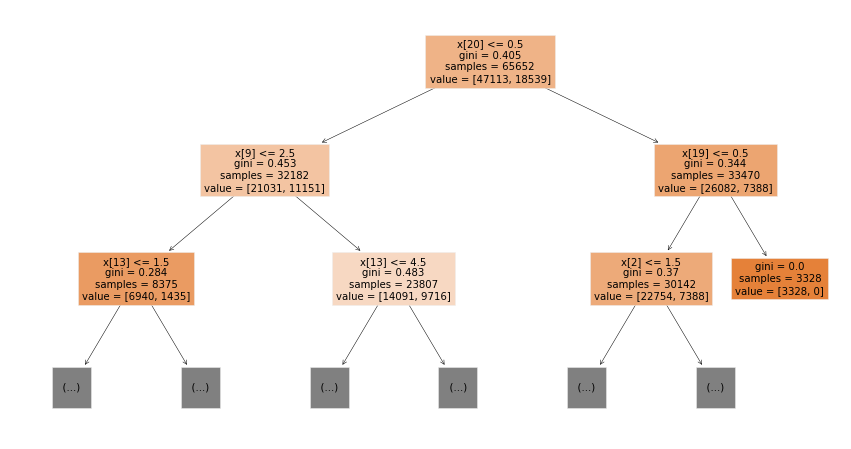

In [16]:
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(model_dt,
               max_depth=2,
               filled = True);
plt.show()

In [17]:
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(model_dt,
               filled = True);
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn import tree
feature_names = x_train.columns
# class_names = model_dt.classes_

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/' #Нужно скачать Graphviz и указать путь до папки 

import graphviz
dot_data = tree.export_graphviz(model_dt, out_file=None, 
                                feature_names=feature_names,
                                class_names = True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("hotel_demand_dt", format='pdf')
graph.render("hotel_demand_dt", format='png')
graph

In [ ]:
from sklearn.model_selection import GridSearchCV

parametrs = { 'n_estimators': range (10, 110, 10),
              'max_depth': range (1,18, 2) }
rfs = RandomForestClassifier()
grid = GridSearchCV(rfs, parametrs, cv=3, n_jobs=-1)
grid.fit(x_train, y_train)
rfs_best_params_ =  grid.best_params_
rfs_best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(**rfs_best_params_)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

In [18]:
from sklearn.model_selection import GridSearchCV

parametrs = {'max_depth': range (1,18, 2) }
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parametrs, cv=3, n_jobs=-1)
grid.fit(x_train, y_train)
dt_best_params_ =  grid.best_params_
dt_best_params_

{'max_depth': 13}

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(**dt_best_params_)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     11757
           1       0.65      0.53      0.59      4657

    accuracy                           0.79     16414
   macro avg       0.74      0.71      0.72     16414
weighted avg       0.78      0.79      0.78     16414



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parametrs = {'n_neighbors': range (1,2),
            'metric': ['manhattan', 'l1', 'l2'],
            'weights': ['distance', 'uniform']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parametrs, n_jobs=-1)
grid.fit(x_train, y_train)
knn_best_params_ =  grid.best_params_
knn_best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(**knn_best_params_)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     11757
           1       0.48      0.53      0.50      4657

    accuracy                           0.70     16414
   macro avg       0.64      0.65      0.64     16414
weighted avg       0.71      0.70      0.71     16414



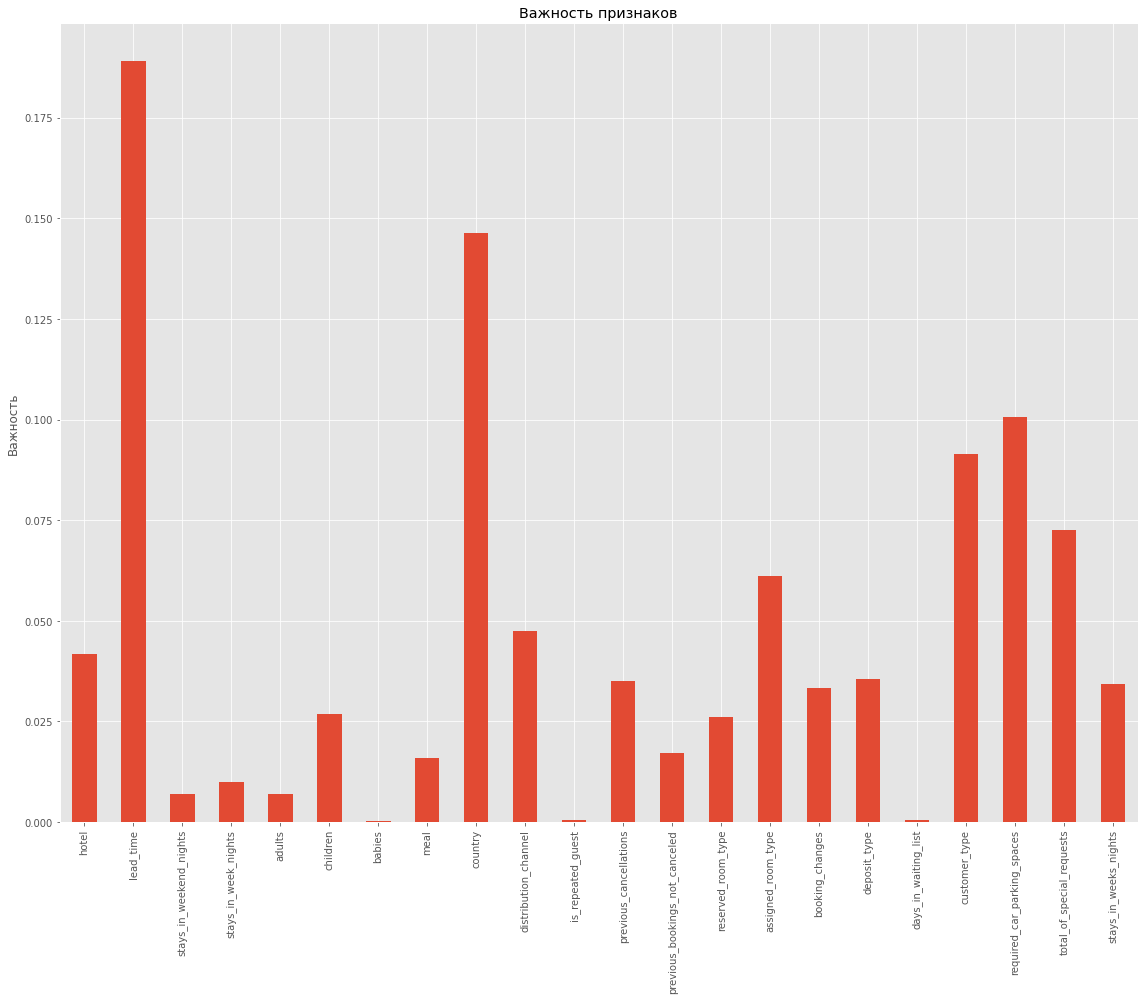

In [33]:
dt_importance = pd.Series(model_dt.feature_importances_,
                         x_test.columns)

fig, ax = plt.subplots(figsize=(16,14))
dt_importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

In [26]:
# def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

#     # setup marker generator and color map
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])

#     # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())

#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#                     alpha=0.8, c=cmap(idx),
#                     marker=markers[idx], label=cl)

In [27]:
# x_test_ = x_test[['lead_time','country']]
# x_test_

,lead_time,country
44139,85,135
92593,126,59
77972,16,135
31378,99,23
12740,0,135
...,...,...
47374,46,163
48724,56,25
27857,18,15
98910,107,43


In [32]:
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt

# plot_decision_regions(x_test_, y_test, model_dt)

InvalidIndexError: (slice(None, None, None), 0)

In [30]:
# model_dt

DecisionTreeClassifier(max_depth=13)

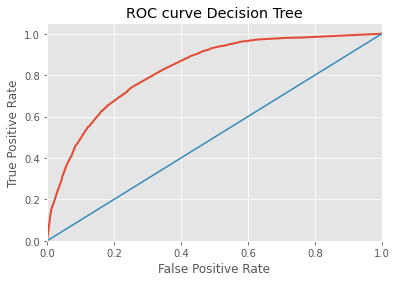

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(x_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve Decision Tree')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Decision Tree')
plt.show()

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(x_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Random Forest')
plt.show()

NameError: name 'model_rf' is not defined

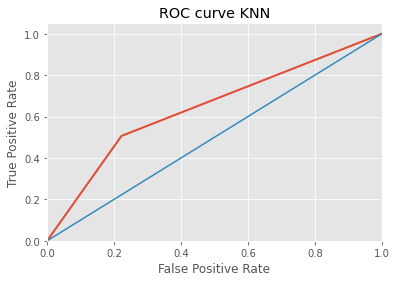

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(x_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve KNN')
plt.show()

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model_svc.predict_proba(x_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SVM')
plt.show()

AttributeError: predict_proba is not available when  probability=False